In [5]:
import xarray as xr
import dask as dd
import pandas as pd
import numpy as np
import pint
from netCDF4 import Dataset
import datetime
from numba import jit
from ipypb import track
u = pint.UnitRegistry()

In [6]:
x = 100
y = 100
polarization = 180
power = 5
wavstart = 780
wavend = 900

In [7]:
test = Dataset('NeogiLab_test.nc', 'w', format="NETCDF4")

In [8]:
x = test.createDimension('x', x)
y = test.createDimension('y', y)
pol = test.createDimension('pol', polarization)
pwr = test.createDimension('pwr', power)
wav = test.createDimension('wav', (wavend-wavstart)/2)
ori = test.createDimension('ori', 2)

In [9]:
test.title = 'RASHG test file'
test.institution = 'University of North Texas'
test.date = str(datetime.date.today())

In [10]:
ori.size

2

In [11]:
x = test.createVariable('x', np.uint16, ('x',), zlib=True)
y = test.createVariable('y', np.uint16, ('y',), zlib=True)
pol = test.createVariable('pol', np.uint16, ('pol',), zlib=True)
pol.longname = 'Polarization Angle'
pol.units = 'degree'
ori = test.createVariable('ori', np.uint16, ('ori',), zlib=True)
ori.longname = 'Output Polarization Orientation'
pwr = test.createVariable('pwr', np.uint16, ('pwr',), zlib=True)
pwr.longname = 'Laser Power'
pwr.units = 'milliwatt'
wav = test.createVariable('wav', np.uint16, ('wav',), zlib=True)
wav.longname = 'Laser Wavelength'
wav.units = 'nanometer'
shg = test.createVariable('shg', np.uint16, ('x', 'y', 'ori', 'pol', 'pwr', 'wav'), zlib=True, chunksizes=[x.size,y.size,1,pol.size,1,1])

In [12]:
x[:] = np.arange(x.size, dtype=np.uint16)
y[:] = np.arange(y.size, dtype=np.uint16)
ori[:] = np.arange(ori.size, dtype=np.uint16)
pol[:] = np.arange(pol.size, dtype=np.uint16)
pwr[:] = np.arange(pwr.size, dtype=np.uint16)
wav[:] = np.arange(wavstart, wavend, 2, dtype=np.uint16)

In [13]:
for w in range(wav.size):
    print(wav[w])

780
782
784
786
788
790
792
794
796
798
800
802
804
806
808
810
812
814
816
818
820
822
824
826
828
830
832
834
836
838
840
842
844
846
848
850
852
854
856
858
860
862
864
866
868
870
872
874
876
878
880
882
884
886
888
890
892
894
896
898


In [14]:
@jit()
def FakeData():
    for w in track(range(wav.size)):
        for pw in pwr:
            for o in ori:
                for p in pol:
                    shg[:,:,o,p,pw,w] = np.random.randint(0, high=255, size=(x.size, y.size), dtype=np.uint16)

In [15]:
FakeData()

<ipython-input-14-c617074bb2cf>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "FakeData" failed type inference due to: Untyped global name 'track': cannot determine Numba type of <class 'type'>

File "<ipython-input-14-c617074bb2cf>", line 3:
def FakeData():
    for w in track(range(wav.size)):
    ^

  @jit()
<ipython-input-14-c617074bb2cf>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "FakeData" failed type inference due to: Untyped global name 'track': cannot determine Numba type of <class 'type'>

File "<ipython-input-14-c617074bb2cf>", line 3:
def FakeData():
    for w in track(range(wav.size)):
    ^

  @jit()
/Users/tracebivens/opt/miniconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:177: NumbaWarning: Function "FakeData" was compiled in object mode without forceobj=True, but has lifted loops.

File "<ipython-input-14-c617074bb2cf>", line 3:
def

 [████████████████████████████████████████████████████████████] 60/60 [01:42<00:02, 1.70s/it]

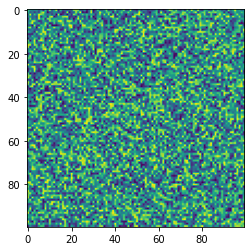

In [16]:
import matplotlib.pyplot as plt
plt.imshow(shg[:,:,0,0,0,0])

In [18]:
test.close()

In [19]:
test = xr.open_dataset('NeogiLab_test.nc')

In [20]:
test

<xarray.Dataset>
Dimensions:  (ori: 2, pol: 180, pwr: 5, wav: 60, x: 100, y: 100)
Coordinates:
  * x        (x) uint16 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) uint16 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * pol      (pol) uint16 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
  * ori      (ori) uint16 0 1
  * pwr      (pwr) uint16 0 1 2 3 4
  * wav      (wav) uint16 780 782 784 786 788 790 ... 888 890 892 894 896 898
Data variables:
    shg      (x, y, ori, pol, pwr, wav) uint16 ...
Attributes:
    title:        RASHG test file
    institution:  University of North Texas
    date:         2020-07-15

In [25]:
shg = test.shg

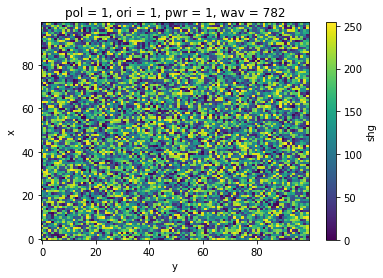

In [26]:
shg[:,:,1,1,1,1].plot()

In [ ]:
np.random.rand(x.size,y.size)

In [11]:
test.close()

In [42]:
arr = xr.open_dataset('20mW_Wavelength.hspy')

In [43]:
arr

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    file_format:          HyperSpy
    file_format_version:  3.0

In [41]:
arr.data

AttributeError: 'Dataset' object has no attribute 'data'